In [1]:
# We are going to get our data 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-15 18:51:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.05s   

2023-04-15 18:51:26 (3.30 MB/s) - 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv' saved [178509/178509]



# Reading with Pandas

In [2]:
import pandas as pd

df = pd.read_csv("/Users/rish/Finance/Tensorflow_Time_Series/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
        parse_dates=["Date"], 
        index_col = ["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


####  Return over time

In [2]:
# Return over time 
def return_over_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]

    return (days * daily_ret)

In [3]:
return_over_time(df, syear = 2013, smonth = 10, sday = 10, eyear = 2020, emonth = 1, eday = 12)

KeyError: 'Date'

## Info with pandas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


# Loading in data with Python CSV

In [1]:
import csv
from datetime import datetime

timestamp = []
price = []
with open("/Users/rish/Finance/Tensorflow_Time_Series/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as file:
    bitcoin_data = csv.reader(file)
    next(bitcoin_data)
    for line in bitcoin_data:
        timestamp.append(datetime.strptime(line[1], "%Y-%m-%d"))
        price.append(float(line[2]))


In [20]:
timestamp[:10], price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

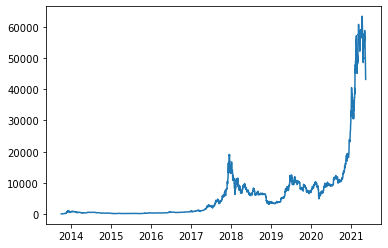

In [21]:
import matplotlib.pyplot as plt

plt.plot(timestamp, price)

In [6]:
# We can also do
bitcoin_price = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})

<AxesSubplot:xlabel='Date'>

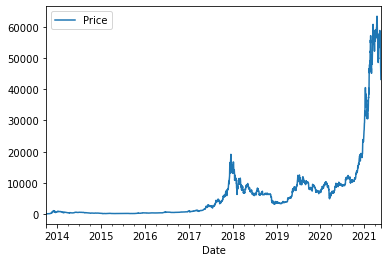

In [9]:
bitcoin_price.plot()

# Train and test data

In [2]:
split_size = int(0.8 * len(price))

In [3]:
X_train, y_train = timestamp[:split_size], price[:split_size]
X_test, y_test = timestamp[split_size:], price[split_size:]
